# Team Game Stats Exploratory Data Analysis

## Importing and Describing Data

In [41]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/raw')

df = pd.read_csv('raw_team_game_stats_data_2022.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92727 entries, 0 to 92726
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   game_id     92727 non-null  int64 
 1   school      92727 non-null  object
 2   conference  92160 non-null  object
 3   homeAway    92727 non-null  object
 4   points      92727 non-null  int64 
 5   category    92727 non-null  object
 6   stat        92727 non-null  object
dtypes: int64(2), object(5)
memory usage: 5.0+ MB


In [2]:
df.category.unique()

array(['rushingTDs', 'puntReturnYards', 'puntReturnTDs', 'puntReturns',
       'passingTDs', 'kickingPoints', 'interceptionYards',
       'interceptionTDs', 'passesIntercepted', 'fumblesRecovered',
       'totalFumbles', 'tacklesForLoss', 'defensiveTDs', 'tackles',
       'sacks', 'qbHurries', 'passesDeflected', 'possessionTime',
       'interceptions', 'fumblesLost', 'turnovers', 'totalPenaltiesYards',
       'yardsPerRushAttempt', 'rushingAttempts', 'rushingYards',
       'yardsPerPass', 'completionAttempts', 'netPassingYards',
       'totalYards', 'fourthDownEff', 'thirdDownEff', 'firstDowns',
       'kickReturnYards', 'kickReturnTDs', 'kickReturns'], dtype=object)

In [3]:
df.head()

,game_id,school,conference,homeAway,points,category,stat
0,401411101,Clemson,ACC,away,41,rushingTDs,3
1,401411101,Clemson,ACC,away,41,puntReturnYards,48
2,401411101,Clemson,ACC,away,41,puntReturnTDs,0
3,401411101,Clemson,ACC,away,41,puntReturns,6
4,401411101,Clemson,ACC,away,41,passingTDs,2


In [4]:
# Looking to see the structure of stat of each category
df.groupby('category').nth(0)

,game_id,school,conference,homeAway,points,stat
category,,,,,,
completionAttempts,401411101,Clemson,ACC,away,41,23-38
defensiveTDs,401411101,Clemson,ACC,away,41,0
firstDowns,401411101,Clemson,ACC,away,41,22
fourthDownEff,401411101,Clemson,ACC,away,41,1-1
fumblesLost,401411101,Clemson,ACC,away,41,1
fumblesRecovered,401411101,Clemson,ACC,away,41,0
interceptionTDs,401411101,Clemson,ACC,away,41,0
interceptionYards,401411101,Clemson,ACC,away,41,0
interceptions,401411101,Clemson,ACC,away,41,0


In [17]:
# Top 20 Schools by 
df2 = df[df.category == 'totalYards']
df2.stat = df2.stat.astype(int)
df2.groupby('school').agg({'stat': 'sum'}).sort_values(by = 'stat', ascending = False).head(20)

/var/folders/cf/z7p1twyn1lv45thqhc6_by5r0000gn/T/ipykernel_89043/3817759223.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.stat = df2.stat.astype(int)


,stat
school,
Incarnate Word,7547
Georgia,7517
Fordham,7307
USC,7090
Western Kentucky,6964
Tennessee,6832
TCU,6825
Washington,6700
UT San Antonio,6664


In [45]:
# Converting data type to numeric - this will work for all the normal int/float values
df['stat'] = df['stat'].apply(lambda x: pd.to_numeric(x, errors = 'ignore'))

In [26]:
# Top 20 Schools by TotalYards
df[df.category == 'totalYards'].groupby('school').agg({'stat': 'sum'}).sort_values(by = 'stat', ascending = False).head(20)

,stat
school,
Incarnate Word,7547
Georgia,7517
Fordham,7307
USC,7090
Western Kentucky,6964
Tennessee,6832
TCU,6825
Washington,6700
UT San Antonio,6664


In [32]:
# Top 20 Schools by Avg. PassingTDs
df[df.category == 'passingTDs'].groupby('school').agg({'stat': 'mean'}).sort_values(by = 'stat', ascending = False).head(10)

,stat
school,
Fordham,4.833333
Incarnate Word,4.461538
Wake Forest,3.307692
Ohio State,3.230769
Samford,3.181818
Lindenwood,3.100000
Jackson State,3.083333
Houston,3.076923
Western Kentucky,3.071429


Text(0.5, 1.0, 'Rushing TDs vs Passing TDs')

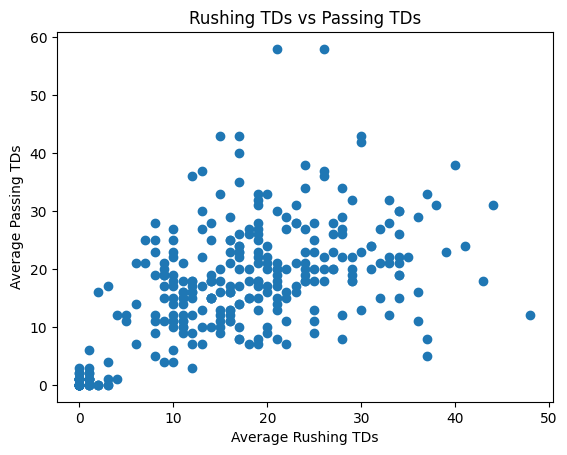

In [46]:
# Rushing TDs vs Passing TDs
plt.scatter(x=df[df.category == 'rushingTDs'].groupby('school').agg({'stat': 'sum'}), y =df[df.category == 'passingTDs'].groupby('school').agg({'stat': 'sum'}))
plt.xlabel('Average Rushing TDs')
plt.ylabel('Average Passing TDs')
plt.title('Rushing TDs vs Passing TDs')

In [39]:
df.category.unique()

array(['rushingTDs', 'puntReturnYards', 'puntReturnTDs', 'puntReturns',
       'passingTDs', 'kickingPoints', 'interceptionYards',
       'interceptionTDs', 'passesIntercepted', 'fumblesRecovered',
       'totalFumbles', 'tacklesForLoss', 'defensiveTDs', 'tackles',
       'sacks', 'qbHurries', 'passesDeflected', 'possessionTime',
       'interceptions', 'fumblesLost', 'turnovers', 'totalPenaltiesYards',
       'yardsPerRushAttempt', 'rushingAttempts', 'rushingYards',
       'yardsPerPass', 'completionAttempts', 'netPassingYards',
       'totalYards', 'fourthDownEff', 'thirdDownEff', 'firstDowns',
       'kickReturnYards', 'kickReturnTDs', 'kickReturns'], dtype=object)

In [58]:
# Creating columns that are not numeric and more difficult to work with 
not_num = ['possessionTime', 'totalPenaltiesYards', 'completionAttempts', 'fourthDownEff', 'thirdDownEff']
df_num = df[~df.category.isin(not_num)]
df_not_num = df[df.category.isin(not_num)]


In [61]:
# Creating dummy variables - not sure exaclty what I am going to do with these yet
df_dum = pd.get_dummies(df, prefix = 'cat', columns= ['category'])
df_dum

,game_id,school,conference,homeAway,points,stat,cat_completionAttempts,cat_defensiveTDs,cat_firstDowns,cat_fourthDownEff,...,cat_sacks,cat_tackles,cat_tacklesForLoss,cat_thirdDownEff,cat_totalFumbles,cat_totalPenaltiesYards,cat_totalYards,cat_turnovers,cat_yardsPerPass,cat_yardsPerRushAttempt
0,401411101,Clemson,ACC,away,41,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,401411101,Clemson,ACC,away,41,48,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,401411101,Clemson,ACC,away,41,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,401411101,Clemson,ACC,away,41,6,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,401411101,Clemson,ACC,away,41,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92722,401441993,UAB,Conference USA,home,24,252,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
92723,401441993,UAB,Conference USA,home,24,390,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
92724,401441993,UAB,Conference USA,home,24,1-3,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
92725,401441993,UAB,Conference USA,home,24,7-12,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [62]:
df_dum.columns

Index(['game_id', 'school', 'conference', 'homeAway', 'points', 'stat',
       'cat_completionAttempts', 'cat_defensiveTDs', 'cat_firstDowns',
       'cat_fourthDownEff', 'cat_fumblesLost', 'cat_fumblesRecovered',
       'cat_interceptionTDs', 'cat_interceptionYards', 'cat_interceptions',
       'cat_kickReturnTDs', 'cat_kickReturnYards', 'cat_kickReturns',
       'cat_kickingPoints', 'cat_netPassingYards', 'cat_passesDeflected',
       'cat_passesIntercepted', 'cat_passingTDs', 'cat_possessionTime',
       'cat_puntReturnTDs', 'cat_puntReturnYards', 'cat_puntReturns',
       'cat_qbHurries', 'cat_rushingAttempts', 'cat_rushingTDs',
       'cat_rushingYards', 'cat_sacks', 'cat_tackles', 'cat_tacklesForLoss',
       'cat_thirdDownEff', 'cat_totalFumbles', 'cat_totalPenaltiesYards',
       'cat_totalYards', 'cat_turnovers', 'cat_yardsPerPass',
       'cat_yardsPerRushAttempt'],
      dtype='object')

In [68]:
df_dum.iloc[:,6:].columns

Index(['cat_completionAttempts', 'cat_defensiveTDs', 'cat_firstDowns',
       'cat_fourthDownEff', 'cat_fumblesLost', 'cat_fumblesRecovered',
       'cat_interceptionTDs', 'cat_interceptionYards', 'cat_interceptions',
       'cat_kickReturnTDs', 'cat_kickReturnYards', 'cat_kickReturns',
       'cat_kickingPoints', 'cat_netPassingYards', 'cat_passesDeflected',
       'cat_passesIntercepted', 'cat_passingTDs', 'cat_possessionTime',
       'cat_puntReturnTDs', 'cat_puntReturnYards', 'cat_puntReturns',
       'cat_qbHurries', 'cat_rushingAttempts', 'cat_rushingTDs',
       'cat_rushingYards', 'cat_sacks', 'cat_tackles', 'cat_tacklesForLoss',
       'cat_thirdDownEff', 'cat_totalFumbles', 'cat_totalPenaltiesYards',
       'cat_totalYards', 'cat_turnovers', 'cat_yardsPerPass',
       'cat_yardsPerRushAttempt'],
      dtype='object')

In [71]:
df_dum['cat_turnovers'].values[0]

0

In [73]:
# Want to covert each stat to its own column
df

,game_id,school,conference,homeAway,points,category,stat
0,401411101,Clemson,ACC,away,41,rushingTDs,3
1,401411101,Clemson,ACC,away,41,puntReturnYards,48
2,401411101,Clemson,ACC,away,41,puntReturnTDs,0
3,401411101,Clemson,ACC,away,41,puntReturns,6
4,401411101,Clemson,ACC,away,41,passingTDs,2
...,...,...,...,...,...,...,...
92722,401441993,UAB,Conference USA,home,24,netPassingYards,252
92723,401441993,UAB,Conference USA,home,24,totalYards,390
92724,401441993,UAB,Conference USA,home,24,fourthDownEff,1-3
92725,401441993,UAB,Conference USA,home,24,thirdDownEff,7-12


In [75]:
df_piv = df.pivot(index=['game_id', 'school', 'conference', 'homeAway', 'points'], columns='category', values='stat')
df_piv

category                                                    completionAttempts  \
game_id   school             conference     homeAway points                      
401403853 Hawai'i            Mountain West  home     10                  28-55   
          Vanderbilt         SEC            away     63                  16-28   
401403854 Alabama            SEC            home     55                  27-40   
          Utah State         Mountain West  away     0                    8-22   
401403855 Arkansas           SEC            home     31                  18-26   
...                                                                        ...   
401508851 South Dakota State MVFC           home     39                  11-16   
401508870 Colorado Mines     Rocky Mountain away     14                  20-34   
          Ferris State       GLIAC          home     34                  14-18   
401508871 Mount Union        Ohio           away     21                  26-37   
          North Central      CCIW           home     28                   4-10   

category                                                    defensiveTDs  \
game_id   school             conference     homeAway points                
401403853 Hawai'i            Mountain West  home     10                0   
          Vanderbilt         SEC            away     63                0   
401403854 Alabama            SEC            home     55                0   
          Utah State         Mountain West  away     0                 0   
401403855 Arkansas           SEC            home     31                0   
...                                                                  ...   
401508851 South Dakota State MVFC           home     39              NaN   
401508870 Colorado Mines     Rocky Mountain away     14              NaN   
          Ferris State       GLIAC          home     34              NaN   
401508871 Mount Union        Ohio           away     21              NaN   
          North Central      CCIW           home     28              NaN   

category                                                    firstDowns  \
game_id   school             conference     homeAway points              
401403853 Hawai'i            Mountain West  home     10             20   
          Vanderbilt         SEC            away     63             28   
401403854 Alabama            SEC            home     55             30   
          Utah State         Mountain West  away     0               7   
401403855 Arkansas           SEC            home     31             23   
...                                                                ...   
401508851 South Dakota State MVFC           home     39             21   
401508870 Colorado Mines     Rocky Mountain away     14             14   
          Ferris State       GLIAC          home     34             18   
401508871 Mount Union        Ohio           away     21             20   
          North Central      CCIW           home     28             11   

category                                                    fourthDownEff  \
game_id   school             conference     homeAway points                 
401403853 Hawai'i            Mountain West  home     10               0-4   
          Vanderbilt         SEC            away     63               1-5   
401403854 Alabama            SEC            home     55               0-0   
          Utah State         Mountain West  away     0                2-4   
401403855 Arkansas           SEC            home     31               0-0   
...                                                                   ...   
401508851 South Dakota State MVFC           home     39               1-1   
401508870 Colorado Mines     Rocky Mountain away     14               1-2   
          Ferris State       GLIAC          home     34               0-0   
401508871 Mount Union        Ohio           away     21               2-4   
          North Central      CCIW           home     28  

In [87]:
# Maybe need to merge with team data to get team id first and then merge with games so that way each line can have a team id and a game id\
df2 = df_piv.reset_index()
df2.columns

Index(['game_id', 'school', 'conference', 'homeAway', 'points',
       'completionAttempts', 'defensiveTDs', 'firstDowns', 'fourthDownEff',
       'fumblesLost', 'fumblesRecovered', 'interceptionTDs',
       'interceptionYards', 'interceptions', 'kickReturnTDs',
       'kickReturnYards', 'kickReturns', 'kickingPoints', 'netPassingYards',
       'passesDeflected', 'passesIntercepted', 'passingTDs', 'possessionTime',
       'puntReturnTDs', 'puntReturnYards', 'puntReturns', 'qbHurries',
       'rushingAttempts', 'rushingTDs', 'rushingYards', 'sacks', 'tackles',
       'tacklesForLoss', 'thirdDownEff', 'totalFumbles', 'totalPenaltiesYards',
       'totalYards', 'turnovers', 'yardsPerPass', 'yardsPerRushAttempt'],
      dtype='object', name='category')

In [102]:
df2

category,game_id,school,conference,homeAway,points,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401403853,Hawai'i,Mountain West,home,10,28-55,0,20,0-4,2,...,0,44,0,5-16,4,8-72,358,2,4.5,4.2
1,401403853,Vanderbilt,SEC,away,63,16-28,0,28,1-5,0,...,3,54,0,5-11,1,5-60,601,0,7.0,9.2
2,401403854,Alabama,SEC,home,55,27-40,0,30,0-0,0,...,0,26,5,6-10,NaN,6-40,559,1,7.0,8.7
3,401403854,Utah State,Mountain West,away,0,8-22,0,7,2-4,0,...,1,40,5,3-17,3,11-110,136,0,2.6,2.1
4,401403855,Arkansas,SEC,home,31,18-26,0,23,0-0,1,...,3,36,8,8-16,3,7-63,447,1,8.6,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3145,401508851,South Dakota State,MVFC,home,39,11-16,NaN,21,1-1,0,...,NaN,NaN,NaN,4-8,NaN,3-20,462,0,12.0,7.9
3146,401508870,Colorado Mines,Rocky Mountain,away,14,20-34,NaN,14,1-2,0,...,NaN,NaN,NaN,1-11,NaN,3-25,191,1,0.0,0.2
3147,401508870,Ferris State,GLIAC,home,34,14-18,NaN,18,0-0,1,...,NaN,NaN,NaN,6-13,NaN,10-83,387,1,0.0,4.8
3148,401508871,Mount Union,Ohio,away,21,26-37,NaN,20,2-4,0,...,NaN,NaN,NaN,6-15,NaN,5-30,294,0,0.0,1.7


In [106]:
# Changing directory and then saving file
os.chdir('/Users/wesjurden/Documents/GitHub/Personal/college-football-project/data/transform')
df2.to_csv('trans_team_game_stats_2022.csv', index= False)

In [104]:
# Checking new file
df_new = pd.read_csv('trans_team_game_stats_2022.csv')
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   game_id              3150 non-null   int64  
 1   school               3150 non-null   object 
 2   conference           3128 non-null   object 
 3   homeAway             3150 non-null   object 
 4   points               3150 non-null   int64  
 5   completionAttempts   3148 non-null   object 
 6   defensiveTDs         1765 non-null   float64
 7   firstDowns           3148 non-null   float64
 8   fourthDownEff        3148 non-null   object 
 9   fumblesLost          3148 non-null   float64
 10  fumblesRecovered     3148 non-null   float64
 11  interceptionTDs      1753 non-null   float64
 12  interceptionYards    1753 non-null   float64
 13  interceptions        3148 non-null   float64
 14  kickReturnTDs        2734 non-null   float64
 15  kickReturnYards      2734 non-null   f

In [105]:
df_new.head()

,game_id,school,conference,homeAway,points,completionAttempts,defensiveTDs,firstDowns,fourthDownEff,fumblesLost,...,sacks,tackles,tacklesForLoss,thirdDownEff,totalFumbles,totalPenaltiesYards,totalYards,turnovers,yardsPerPass,yardsPerRushAttempt
0,401403853,Hawai'i,Mountain West,home,10,28-55,0.0,20.0,0-4,2.0,...,0.0,44.0,0.0,5-16,4.0,8-72,358.0,2.0,4.5,4.2
1,401403853,Vanderbilt,SEC,away,63,16-28,0.0,28.0,1-5,0.0,...,3.0,54.0,0.0,5-11,1.0,5-60,601.0,0.0,7.0,9.2
2,401403854,Alabama,SEC,home,55,27-40,0.0,30.0,0-0,0.0,...,0.0,26.0,5.0,6-10,NaN,6-40,559.0,1.0,7.0,8.7
3,401403854,Utah State,Mountain West,away,0,8-22,0.0,7.0,2-4,0.0,...,1.0,40.0,5.0,3-17,3.0,11-110,136.0,0.0,2.6,2.1
4,401403855,Arkansas,SEC,home,31,18-26,0.0,23.0,0-0,1.0,...,3.0,36.0,8.0,8-16,3.0,7-63,447.0,1.0,8.6,5.0
